# 人脸对齐

对于行业外的人来说，人脸对齐这个说法多多少少有些陌生。人脸对齐的本质很简单——通过旋转、平移与缩放将目标人脸区域放置在图像特定位置。这是人脸识别系统中的一种标准操作。这样做可以减小需要处理的人脸图像在空间分布上的差异。说白了就是降低难度。

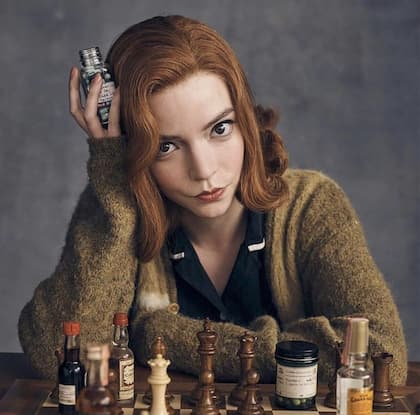

OpenCV版本：4.5.4


In [1]:
import cv2
from PIL import Image

image = cv2.imread("queen.jpg")
display(Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)))
print(f"OpenCV版本：{cv2.__version__}")

人脸对齐可以通过仿射变换来实现。变换的核心为仿射变换矩阵，它描述了变换过程的具体参数。仿射变换矩阵可以通过比较图像中特定像素在变换前后的位置差异来实现。对于人脸对齐来说，五官的分布就是一个绝佳的天然参考因素。只需在原始图像中检测面部五官位置，然后规定目标图像中五官应该出现的位置，便可得出变换矩阵。如果使用OpenCV的话，可以使用 `cv2.estimateAffinePartial2D` 函数计算出变换矩阵。

In [2]:
import numpy as np

# 变换前五官坐标
marks = np.array([173, 149, 222, 125, 205, 172, 185, 192, 226, 186]).reshape([-1, 2])

# 变换后的五官坐标
key_marks =  np.array([65, 65, 130, 65, 96, 96, 75, 130, 117, 130]).reshape([-1, 2])

# 求解变换矩阵
M, _ = cv2.estimateAffinePartial2D(marks, key_marks)
print(f"变换矩阵：{M}")

变换矩阵：[[   1.23528004   -0.36404978  -94.46002872]
 [   0.36404978    1.23528004 -182.03733844]]


然后再通过 `cv2.warpAffine` 函数实施仿射变换。

In [3]:
transformed = cv2.warpAffine(image, M, (192, 192), borderValue=0.0)

对齐后的图像如下：

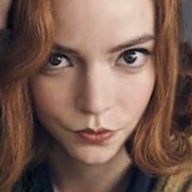

In [4]:
display(Image.fromarray(cv2.cvtColor(transformed, cv2.COLOR_BGR2RGB)))